<a href="https://colab.research.google.com/github/majeedk526/bayesian_models/blob/master/variational_autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Variational Autoencoders

Ref: https://wiseodd.github.io/techblog/2016/12/10/variational-autoencoder/

In [1]:
from tensorflow.examples.tutorials.mnist import input_data
from keras.layers import Input, Dense, Lambda
from keras.models import Model
from keras.objectives import binary_crossentropy
from keras.callbacks import LearningRateScheduler

import numpy as np
from matplotlib import pyplot as plt
import keras.backend as K
import tensorflow as tf

Using TensorFlow backend.


In [2]:
m=50 # batch size
n_z=2
n_epoch=10

inputs = Input(shape=(784,))
h_q = Dense(512, activation='relu')(inputs)
mu = Dense(n_z, activation='linear')(h_q)
log_sigma = Dense(n_z, activation='linear')(h_q)

def sample_z(args):
  mu, log_sigma = args
  eps = K.random_normal(shape=(m,n_z), mean=0, stddev=1.0)
  
  return mu + K.exp(log_sigma/2) * eps

z = Lambda(sample_z)([mu, log_sigma])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
decoder_hidden = Dense(512, activation='relu')
decoder_out = Dense(784, activation='sigmoid')

h_p = decoder_hidden(z)
outputs = decoder_out(h_p)

In [0]:
vae = Model(inputs, outputs)

encoder = Model(inputs, mu)

d_in = Input(shape=(n_z,))
d_h = decoder_hidden(d_in)
d_out= decoder_out(d_h)
decoder = Model(d_in, d_out)

In [0]:
def vae_loss(y_true, y_pred):
  
  recon = K.sum(K.binary_crossentropy(y_true, y_pred), axis=1)
  kl = 0.5 * K.sum(K.exp(log_sigma) + K.square(mu) - 1. - log_sigma, axis=1) 
  
  return recon + kl

In [6]:
mnist = input_data.read_data_sets("./mnist_data/")
X_train = mnist.train.images

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [7]:
vae.compile(optimizer='adam', loss=vae_loss)
history = vae.fit(X_train, X_train, batch_size=m, epochs=n_epoch)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
55000/55000 [==============================] - 6s 117us/step - loss: 184.2560
Epoch 2/10
55000/55000 [==============================] - 4s 72us/step - loss: 164.9778
Epoch 3/10
55000/55000 [==============================] - 4s 72us/step - loss: 161.0783
Epoch 4/10
55000/55000 [==============================] - 4s 72us/step - loss: 158.7295
Epoch 5/10
55000/55000 [==============================] - 4s 72us/step - loss: 157.2163
Epoch 6/10
55000/55000 [==============================] - 5s 82us/step - loss: 156.1490
Epoch 7/10
55000/55000 [==============================] - 5s 83us/step - loss: 155.1238
Epoch 8/10
55000/55000 [==============================] - 4s 73us/step - loss: 154.3398
Epoch 9/10
55000/55000 [==============================] - 4s 72us/step - loss: 153.7405
Epoch 10/10
55000/55000 [==============================] - 4s 71us/step - loss: 153.2499


In [0]:
# Latent space visualization
X_test, Y_test = mnist.test.images, mnist.test.labels
encoded =encoder.predict(X_test, batch_size=m)


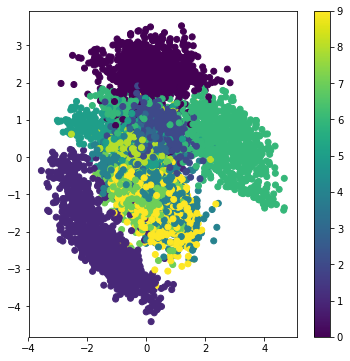

In [16]:
plt.figure(figsize=(6,6))
plt.scatter(encoded[:,0], encoded[:,1],c=Y_test)
plt.colorbar()
plt.show()

In [0]:
# Reconstruction visualization

idxs = np.random.randint(0,X_test.shape[0], size=m)
X_test_subset = X_test[idxs]
X_recon = vae.predict(X_test_subset, batch_size=m)


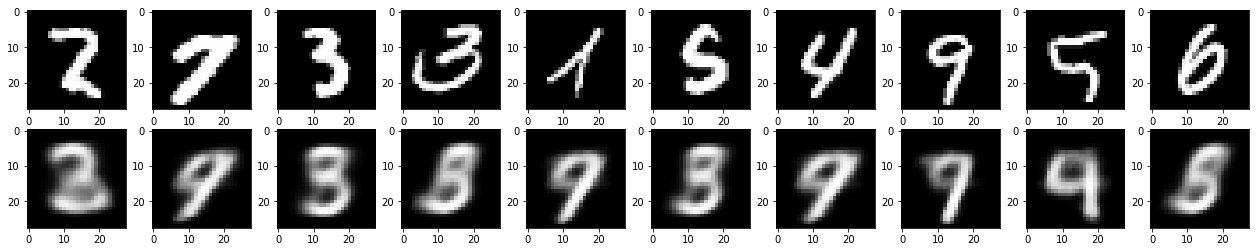

In [21]:
plt.figure(figsize=(22,4))
n=10
for i in range(1,n+1):
  
  plt.subplot(2,n,i)
  plt.imshow(X_test_subset[i].reshape(28,28), cmap='Greys_r')
  
  plt.subplot(2,n,n+i)
  plt.imshow(X_recon[i].reshape(28,28), cmap='Greys_r')

plt.show()

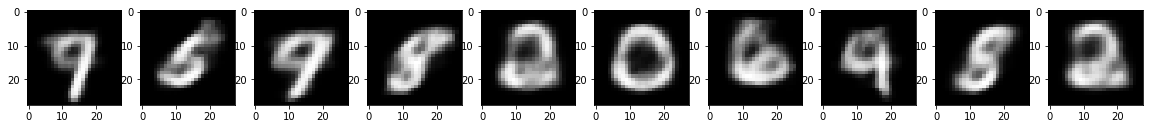

In [23]:
## Generating random samples from latent space

z_sample = np.random.randn(n,n_z)
x_gen = decoder.predict(z_sample)

plt.figure(figsize=(20,4))

for i in range(1,n+1):
  plt.subplot(1,n,i)
  
  plt.imshow(x_gen[i-1].reshape(28,28), cmap='Greys_r')
plt.show()

